In [2]:
# from sympy import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

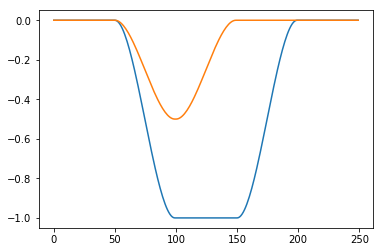

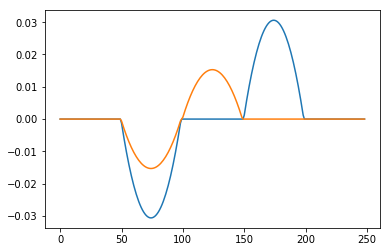

In [8]:
flat_edge_width = 50
tread_edge_width = 50
tread_bottom_width = 50

total_width = flat_edge_width * 2 + tread_edge_width * 2 + tread_bottom_width

# x = symbols('x')
# smooth_step_func = lambdify(x, 3 * x**2 - 2 * x**3)
smooth_step_func = lambda x: 3 * x**2 - 2 * x**3
tread_right_edge = smooth_step_func(np.linspace(0, 1, tread_edge_width)) - 1
tread_left_edge =  - tread_right_edge - 1

major_tread = np.concatenate((np.zeros(flat_edge_width), 
                        tread_left_edge, 
                        -np.ones(tread_bottom_width), 
                        tread_right_edge,
                        np.zeros(flat_edge_width)))

minor_tread = np.concatenate((np.zeros(flat_edge_width), 
                        tread_left_edge * 0.5, 
                        tread_right_edge * 0.5,
                        np.zeros(flat_edge_width)))
minor_tread = np.concatenate((minor_tread, 
                              np.zeros(len(major_tread) - len(minor_tread))))

plt.plot(major_tread)
plt.plot(minor_tread)

plt.figure()
plt.plot(np.diff(major_tread))
plt.plot(np.diff(minor_tread))

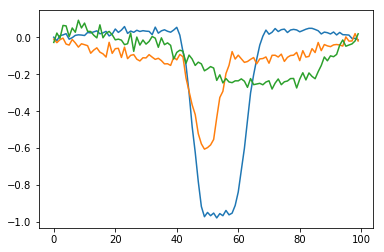

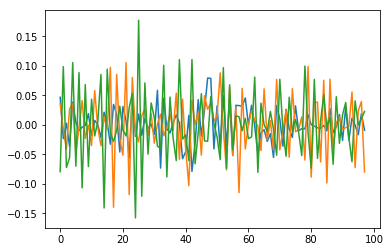

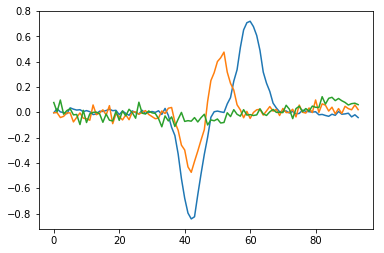

In [17]:
# speed_variation
lateral_acc = 30
avg_speed = 1
vertical_acc = 1
resampled_size = 100
x = np.arange(len(major_tread))
for i in range(1):
    xp = np.cumsum(abs(np.cumsum(np.random.randn(resampled_size)*lateral_acc)))
    xp -= xp[0]
    xp *= avg_speed * len(major_tread) / xp[-1]
    tread = np.interp(xp, x, major_tread)
#     plt.plot(tread)
    laser_noise = np.random.randn(resampled_size)/100
    dc_drift = np.cumsum(np.cumsum(np.random.randn(resampled_size)*vertical_acc)) 
    dc_drift -= np.linspace(dc_drift[0], dc_drift[-1], len(dc_drift))
    dc_drift /= resampled_size * 10
    major_tread_with_noise = tread + dc_drift + laser_noise
    
    tread = np.interp(xp, x, minor_tread)
#     plt.plot(tread)
    laser_noise = np.random.randn(resampled_size)/50
    dc_drift = np.cumsum(np.cumsum(np.random.randn(resampled_size)*vertical_acc)) 
    dc_drift -= np.linspace(dc_drift[0], dc_drift[-1], len(dc_drift))
    dc_drift /= resampled_size * 10
    minor_tread_with_noise = tread + dc_drift + laser_noise
    
    laser_noise = np.random.randn(resampled_size)/50
    dc_drift = np.cumsum(np.cumsum(np.random.randn(resampled_size)*vertical_acc)) 
    dc_drift -= np.linspace(dc_drift[0], dc_drift[-1], len(dc_drift))
    dc_drift /= resampled_size * 5
    
    flat_surface_with_noise = dc_drift + laser_noise
#     plt.plot(dc_drift)
plt.plot(major_tread_with_noise)
plt.plot(minor_tread_with_noise)
plt.plot(flat_surface_with_noise)

plt.figure()
plt.plot(np.diff(major_tread_with_noise, 2))
plt.plot(np.diff(minor_tread_with_noise, 2))
plt.plot(np.diff(flat_surface_with_noise, 2))

dn = 6
plt.figure()
plt.plot(major_tread_with_noise[dn:] - major_tread_with_noise[:-dn])
plt.plot(minor_tread_with_noise[dn:] - minor_tread_with_noise[:-dn])
plt.plot(flat_surface_with_noise[dn:] - flat_surface_with_noise[:-dn])